Unregularized OLS MSE: 0.5995988132220952
Ridge (lambda=0.1) MSE: 0.6230844892399665


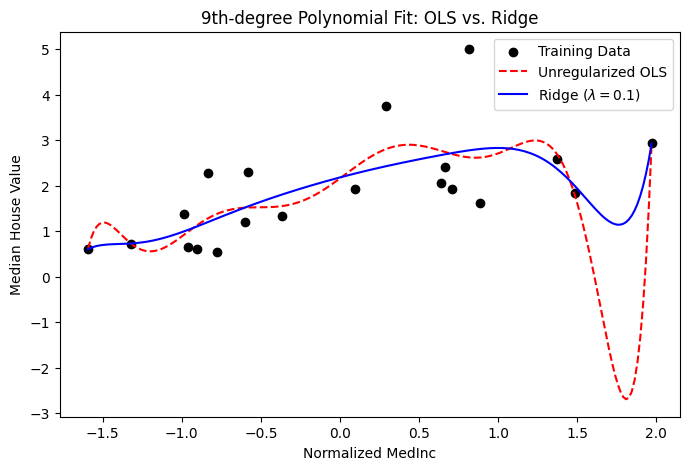

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load California Housing dataset
housing = fetch_california_housing()
x = housing.data[:, 0]  # MedInc (median income)
y = housing.target      # Target (house value)

# Subsample 20 points
np.random.seed(45)  # Do not change it
idx = np.random.choice(len(x), 20, replace=False)
x = x[idx]
y = y[idx]

# 1. Normalize x for numerical stability
x_mean = np.mean(x)
x_std = np.std(x)
x_norm = (x - x_mean) / x_std

# 2. Design matrix for degree 9
degree = 9
# Create polynomial features [1, x^1, x^2, ..., x^9]
Phi = np.column_stack([x_norm**i for i in range(degree+1)])
# Phi has shape (20, 10), each row is [1, x^1, x^2, ..., x^9]

# 3. Unregularized polynomial regression (Normal Equation)
#    theta_ols = (Phi^T Phi)^(-1) Phi^T y
theta_ols = np.linalg.inv(Phi.T @ Phi) @ (Phi.T @ y)

# 4. Ridge Regression with lambda = 0.1
#    theta_ridge = (Phi^T Phi + lambda * I)^(-1) Phi^T y
lam = 0.1
d = Phi.shape[1]  # should be 10
theta_ridge = np.linalg.inv(Phi.T @ Phi + lam * np.eye(d)) @ (Phi.T @ y)

# 5. Predictions on training data
y_pred_ols = Phi @ theta_ols
y_pred_ridge = Phi @ theta_ridge

# Compute MSE for both models
mse_ols = np.mean((y - y_pred_ols)**2)
mse_ridge = np.mean((y - y_pred_ridge)**2)

print("Unregularized OLS MSE:", mse_ols)
print("Ridge (lambda=0.1) MSE:", mse_ridge)

# 6. Plotting
# For a smooth curve, generate a sequence of points over the normalized x-range
x_plot = np.linspace(min(x_norm), max(x_norm), 200)
Phi_plot = np.column_stack([x_plot**i for i in range(degree+1)])

# Predictions for plotting
y_plot_ols = Phi_plot @ theta_ols
y_plot_ridge = Phi_plot @ theta_ridge

plt.figure(figsize=(8, 5))
plt.scatter(x_norm, y, color='black', label='Training Data')
plt.plot(x_plot, y_plot_ols, 'r--', label='Unregularized OLS')
plt.plot(x_plot, y_plot_ridge, 'b-', label='Ridge ($\\lambda=0.1$)')
plt.xlabel("Normalized MedInc")
plt.ylabel("Median House Value")
plt.title("9th-degree Polynomial Fit: OLS vs. Ridge")
plt.legend()
plt.show()
